<h1>Pneumonia detection using Convolutional neural networks</h1>

The dataset used here is chest xray dataset which is preprocessed.
You can find the **Dataset** [here.](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

The dataset consists of :


*   5216 training images of which 3815 are of Pneumonia and 1341 are normal images.
*   624 testing images of which 390 are of Pneumonia and 234 are normal.




In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array

The below mentioned google.colab import drive is used to import drive to colab and drive.mount is used to mount data which is present in drive, so that we can access it. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Creating the train data generator.**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


**Training data which is present in drive.**

In [ ]:
train_images = "/content/drive/MyDrive/chest_xray/train"

Here every image is resized to (300,300)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5244 images belonging to 2 classes.


**Model outputs :**

0 : Normal condition

1 : Pneumonia condition

In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**Validation data generator and loading validation data**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


**Plotting :** Images with Pneumonia from dataset.

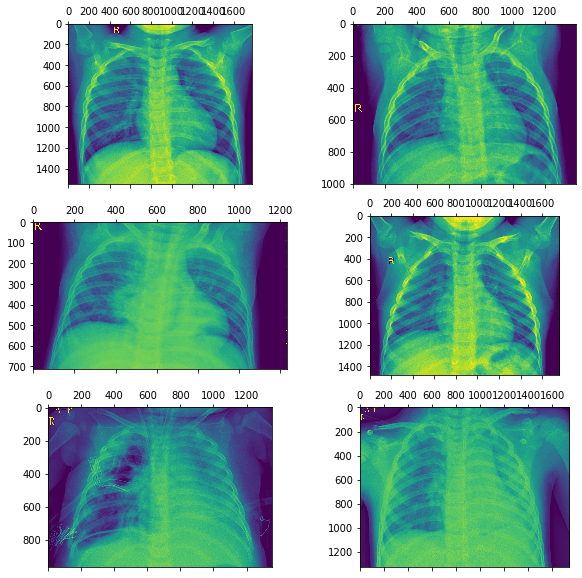

In [ ]:
#Pneumonia
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

**Plotting :** Images without Pneumonia from dataset.

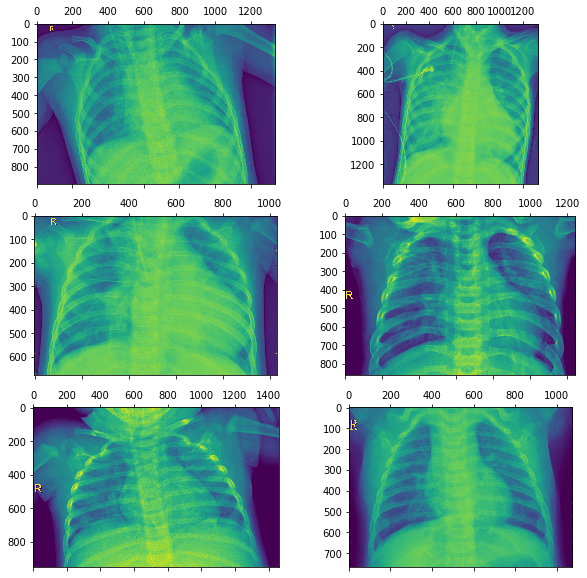

In [ ]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

<h1>Neural Networks using TensorFlow</h1>

Metrics : Accuracy.

In [ ]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy','Precision','Recall',])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

**Training the model for 50 epochs**

In [ ]:
history = model.fit(train_generator, epochs = 25, validation_data = validation_generator)

Epoch 1/25
41/41 [==============================] - 745s 18s/step - loss: 0.5851 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.9922 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/25
41/41 [==============================] - 551s 13s/step - loss: 0.3629 - accuracy: 0.8398 - precision: 0.8814 - recall: 0.9063 - val_loss: 1.2107 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/25
41/41 [==============================] - 550s 13s/step - loss: 0.2598 - accuracy: 0.8961 - precision: 0.9293 - recall: 0.9310 - val_loss: 0.7582 - val_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/25
41/41 [==============================] - 551s 13s/step - loss: 0.2178 - accuracy: 0.9088 - precision: 0.9393 - recall: 0.9379 - val_loss: 1.0784 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/25
41/41 [==============================] - 551s 13s/step - loss: 0.1919 - accuracy: 0.9230 - pr

<h2>Accuracy : 98.16%</h2>

<h2>Val_accuracy : 100%</h2>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

**<h3>Plotting Loss Vs Num. of Epochs</h3>**

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


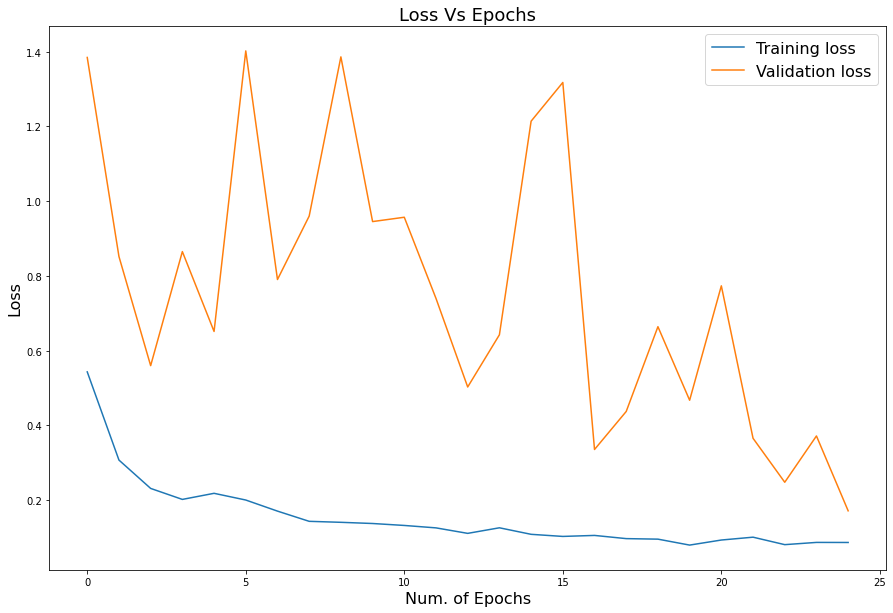

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

**<h3>Plotting Accuracy Vs Num. of Epochs</h3>**

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


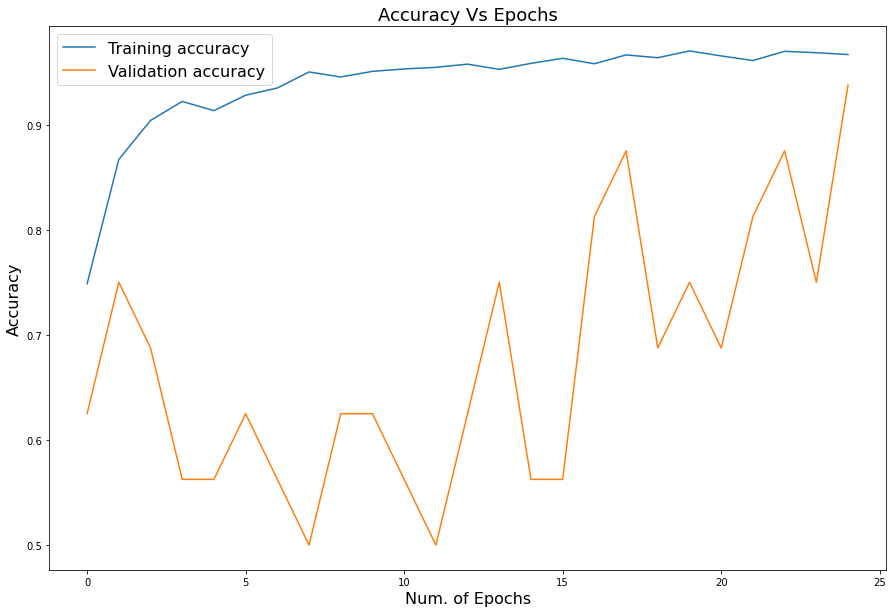

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

<h3>Saving the model</h3>

In [ ]:
model.save("trained.h5")

<h3>Loading the saved model so that we can load the model which is already saved so lot of time can be saved and it can also be used for deployment.</h3>

In [ ]:
from keras.models import load_model
model = load_model("trained.h5")

**Loading the test data generator from drive**

In [ ]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss : 0.2363322377204895
accuracy : 0.9214743375778198


The accuracy of test data is : <h3>92.1474%</h3>

**An image is used from drive for prediction**

In [ ]:
img= cv2.imread('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0017-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

array([[0.01266939]], dtype=float32)

The prediction shows value as **0.01** which is less than 0.5

so our model has to predict it as Normal which is done below.

Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

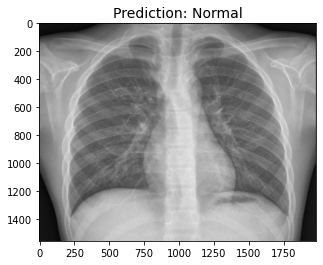

In [ ]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [ ]:
img= cv2.imread('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

array([[0.99988794]], dtype=float32)

Here another image is used and the model predicted it as **0.999** which is greater than 0.5.

so it have be Pneumonia image which is predicted below.

Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

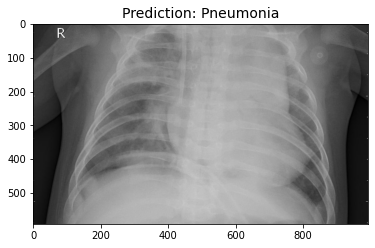

In [ ]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

<h2>Conclusion :</h2>

This model can be used in Healthcare industry in the radiological department.

It can be deployed to Xray machines.

This can help radiologist to predict the chest xray images easily and accurately.
